In [411]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import random

X, y = load_svmlight_file("C:\\Users\\Administrator\\Desktop\\australian.txt")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [412]:
X_train = X_train.toarray()
X_test = X_test.toarray()

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
X_test = np.column_stack((X_test, np.ones(X_test.shape[0])))

y_train = np.array(y_train).reshape(y_train.shape[0],1)
y_test = np.array(y_test).reshape(y_test.shape[0],1)

In [413]:
def loss (X, W, y):
    ret = 0
    tmp = X.dot(W) * y
    for i in range(0,tmp.shape[0]):
        if tmp[i][0] < 1 :
            ret += 1 - tmp[i][0]
    global C
    ret *= C
    ret += ((W * W).sum() - W[W.shape[0]-1][0] * W[W.shape[0]-1][0]) / 2
    return ret / X.shape[0]

In [414]:
def grad (X, W, y):
    tmp = X.dot(W) * y
    X_tmp = []
    y_tmp = []
    for i in range(0,tmp.shape[0]):
        if tmp[i][0] <= 1 :
            X_tmp.append(X[i])
            y_tmp.append(y[i])
    X_tmp = np.array(X_tmp)
    y_tmp = np.array(y_tmp)
    global C
    tmp = X_tmp.T.dot(y_tmp) * C
    ret = W - tmp
    ret[ret.shape[0]-1][0] = -1.0 * C * y_tmp.sum()
    return ret

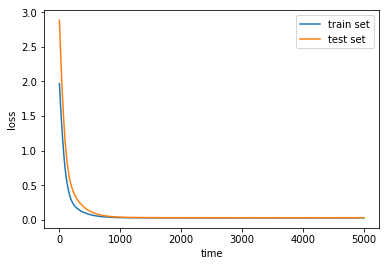

In [415]:
train = []
test = []
time = []

rate = 0.002
C = 0.1

W = np.zeros((X_train.shape[1], 1))
for i in range(0, X_train.shape[1]):
    W[i][0] = random.uniform(-10.0, 10.0)

for i in range(1,5001):
    D = grad(X_train, W, y_train)
    W -= rate * D
    time.append(i)
    train.append(loss(X_train, W, y_train))
    test.append(loss(X_test, W, y_test))
    

import matplotlib.pyplot as plt

plt.plot(time, train, label='train set')
plt.plot(time, test, label='test set')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')
plt.show()
